# Decision Tree

A Decision Tree is an algorithm used for supervised learning problems such as classification or regression.
A decision tree is a graphical representation of all possible solutions to a decision based on certain conditions. On each step or node of a decision tree, used for classification, we try to form a condition on the features to separate all the labels or classes contained in the dataset to the fullest purity.

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [253]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [254]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [255]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [256]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [258]:
#making original data safe and its copy is in use
df1 = df.copy()
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [259]:
#finding NA values
df1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [260]:
df1['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [261]:
df1['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [262]:
df1['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [263]:
df1.shape

(600, 6)

In [264]:
#outlier
def count_plot(df, columns):
    plt.figure(figsize=(8,5))
    for i,var  in enumerate(columns):
        plt.subplot(1,2,1)
        g = sns.countplot(df[var])
    plt.tight_layout()
    
features = df1.columns.tolist()
features.remove('Taxable.Income')
features

['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

D:\Vish\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-264-506a49814742>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
D:\Vish\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ip

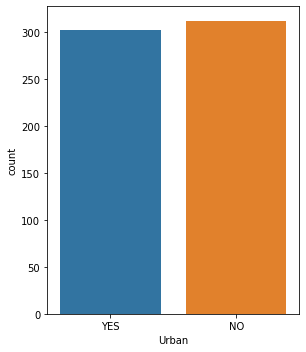

In [265]:
count_plot(df1, features)
plt.show()

In [266]:
#ordinal encoder : In ordinal encoding, each unique category value is assigned an integer value.
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(df1[features])
df1_encoded = pd.DataFrame(data_encoded,columns = features)

data_encoded

array([[  0.,   2.,  84.,  10.,   1.],
       [  1.,   0., 398.,  18.,   1.],
       [  0.,   1., 481.,  30.,   1.],
       ...,
       [  0.,   0., 459.,   0.,   1.],
       [  1.,   1., 533.,  17.,   0.],
       [  0.,   0., 477.,  16.,   0.]])

In [267]:
df1_encoded.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,2.0,84.0,10.0,1.0
1,1.0,0.0,398.0,18.0,1.0
2,0.0,1.0,481.0,30.0,1.0
3,1.0,2.0,574.0,15.0,1.0
4,0.0,1.0,4.0,28.0,0.0


In [268]:
#Converting data in to categotical form 
df1.loc[df1["Taxable.Income"]>=30000,"Income"]="Good"
df1.loc[df1["Taxable.Income"]<=30000,"Income"]="Risky"

In [269]:
df1.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good
599,NO,Divorced,96519,158137,16,NO,Good


In [311]:
#Label Encoder : LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(df1['Income'])
target_encoded = df1_encoded['Income'] 
encoder.inverse_transform(target_encoded)

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [271]:
df1_encoded.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0.0,2.0,84.0,10.0,1.0,0
1,1.0,0.0,398.0,18.0,1.0,0
2,0.0,1.0,481.0,30.0,1.0,0
3,1.0,2.0,574.0,15.0,1.0,0
4,0.0,1.0,4.0,28.0,0.0,0


In [272]:
df1_encoded.shape

(600, 6)

In [273]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns 

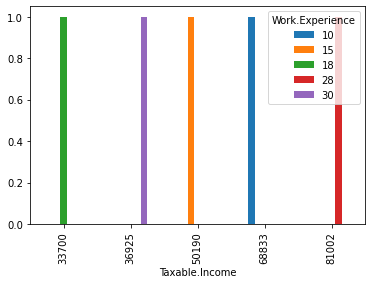

In [274]:
#Barplot betn two diff. category
pd.crosstab(df1['Taxable.Income'].head(),df1['Work.Experience'].head()).plot(kind='bar')
plt.show()

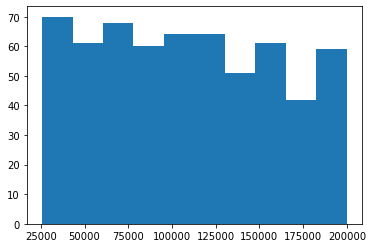

In [275]:
# histogram
plt.hist(df1['City.Population'])
plt.show()

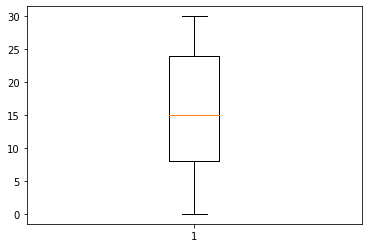

In [276]:
# boxplot
plt.boxplot(df1['Work.Experience'],vert = True)
plt.show()
#no outlier

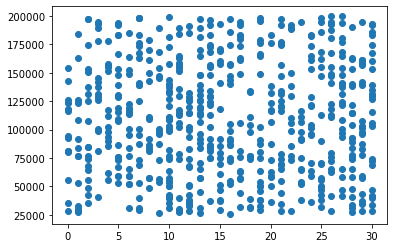

In [277]:
plt.scatter(df1['Work.Experience'],df1['City.Population'])
plt.show()

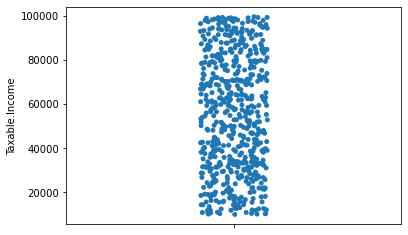

In [278]:
sns.stripplot(y='Taxable.Income',data=df1,jitter=True)
plt.show()

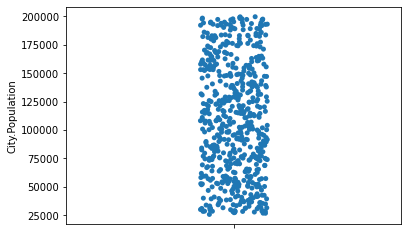

In [279]:
sns.stripplot(y='City.Population',data=df1,jitter=True)
plt.show()

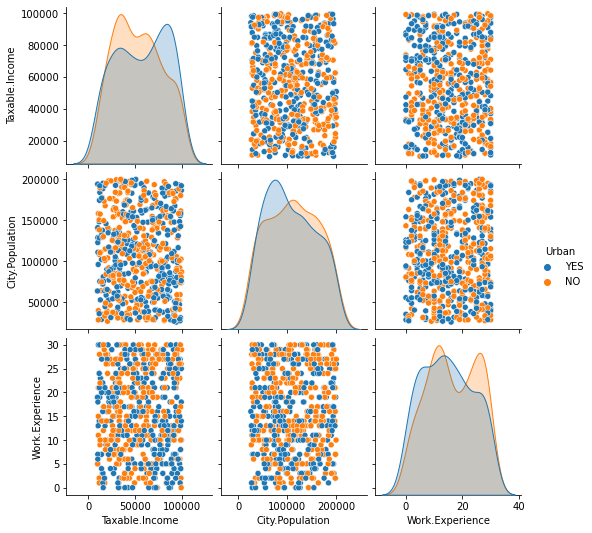

In [280]:
# pairplot   
sns.pairplot(df,hue='Urban')
plt.show()

In [281]:
#feature selection

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [282]:
# here X is denoted as metrics and small y denoted as vector
X = df1_encoded.iloc[:,:-1]
y = df1_encoded['Income']

X = df1_encoded[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]
y = df1_encoded[['Income']]

In [283]:
X.head(3)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,2.0,84.0,10.0,1.0
1,1.0,0.0,398.0,18.0,1.0
2,0.0,1.0,481.0,30.0,1.0


In [284]:
y.head(2)

,Income
0,0
1,0


In [285]:
#Splitting dataset into train & test split

# using this train and test we prevent the over fitting part of dataseet
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

print("shape of x_train",X_train.shape)
print("shape of x_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (420, 5)
shape of x_test (180, 5)
shape of y_train (420, 1)
shape of y_test (180, 1)


In [286]:
X_train.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.033353,0.089697,0.031723,-0.057153
Marital.Status,0.033353,1.000000,0.027385,-0.005067,0.028701
City.Population,0.089697,0.027385,1.000000,0.002756,-0.064580
Work.Experience,0.031723,-0.005067,0.002756,1.000000,-0.075808
Urban,-0.057153,0.028701,-0.064580,-0.075808,1.000000


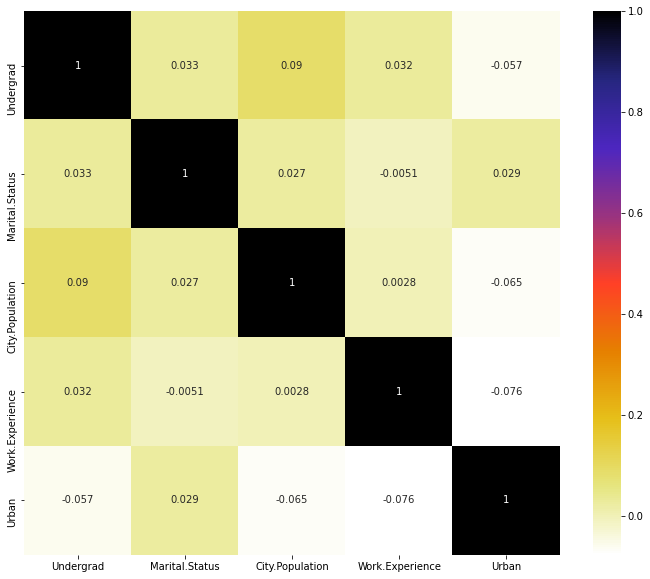

In [287]:
# using pearson correlation,we are doing correlation on X_train dataset. 
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [288]:
def correlation(dataset,threshold):
    col_corr = set()  
    corr_metrix = dataset.corr()
    for i in range(len(corr_metrix.columns)):
        for j in range(i):
            if (corr_metrix.iloc[i,j]) > threshold: 
                colnames = corr_metrix.columns[i]  # getting the names of colimns
                col_corr.add(colnames)
    return col_corr

In [289]:
corr_features = correlation(X_train,0.7)
len(set(corr_features))

0

In [290]:
corr_features

set()

In [291]:
# training the decision tree model
from sklearn.tree import DecisionTreeClassifier     

In [292]:
#GINI method

classifier1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
classifier1

DecisionTreeClassifier(max_depth=3)

In [293]:
classifier1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [294]:
classifier1.score(X_test,y_test)

0.7722222222222223

In [295]:
#It gives good accuracy.

In [296]:
#ENTROPY Method
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth= 3)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

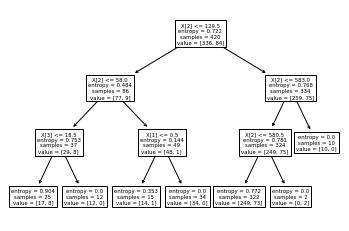

In [297]:
# Plotting Decision tree
tree.plot_tree(classifier);

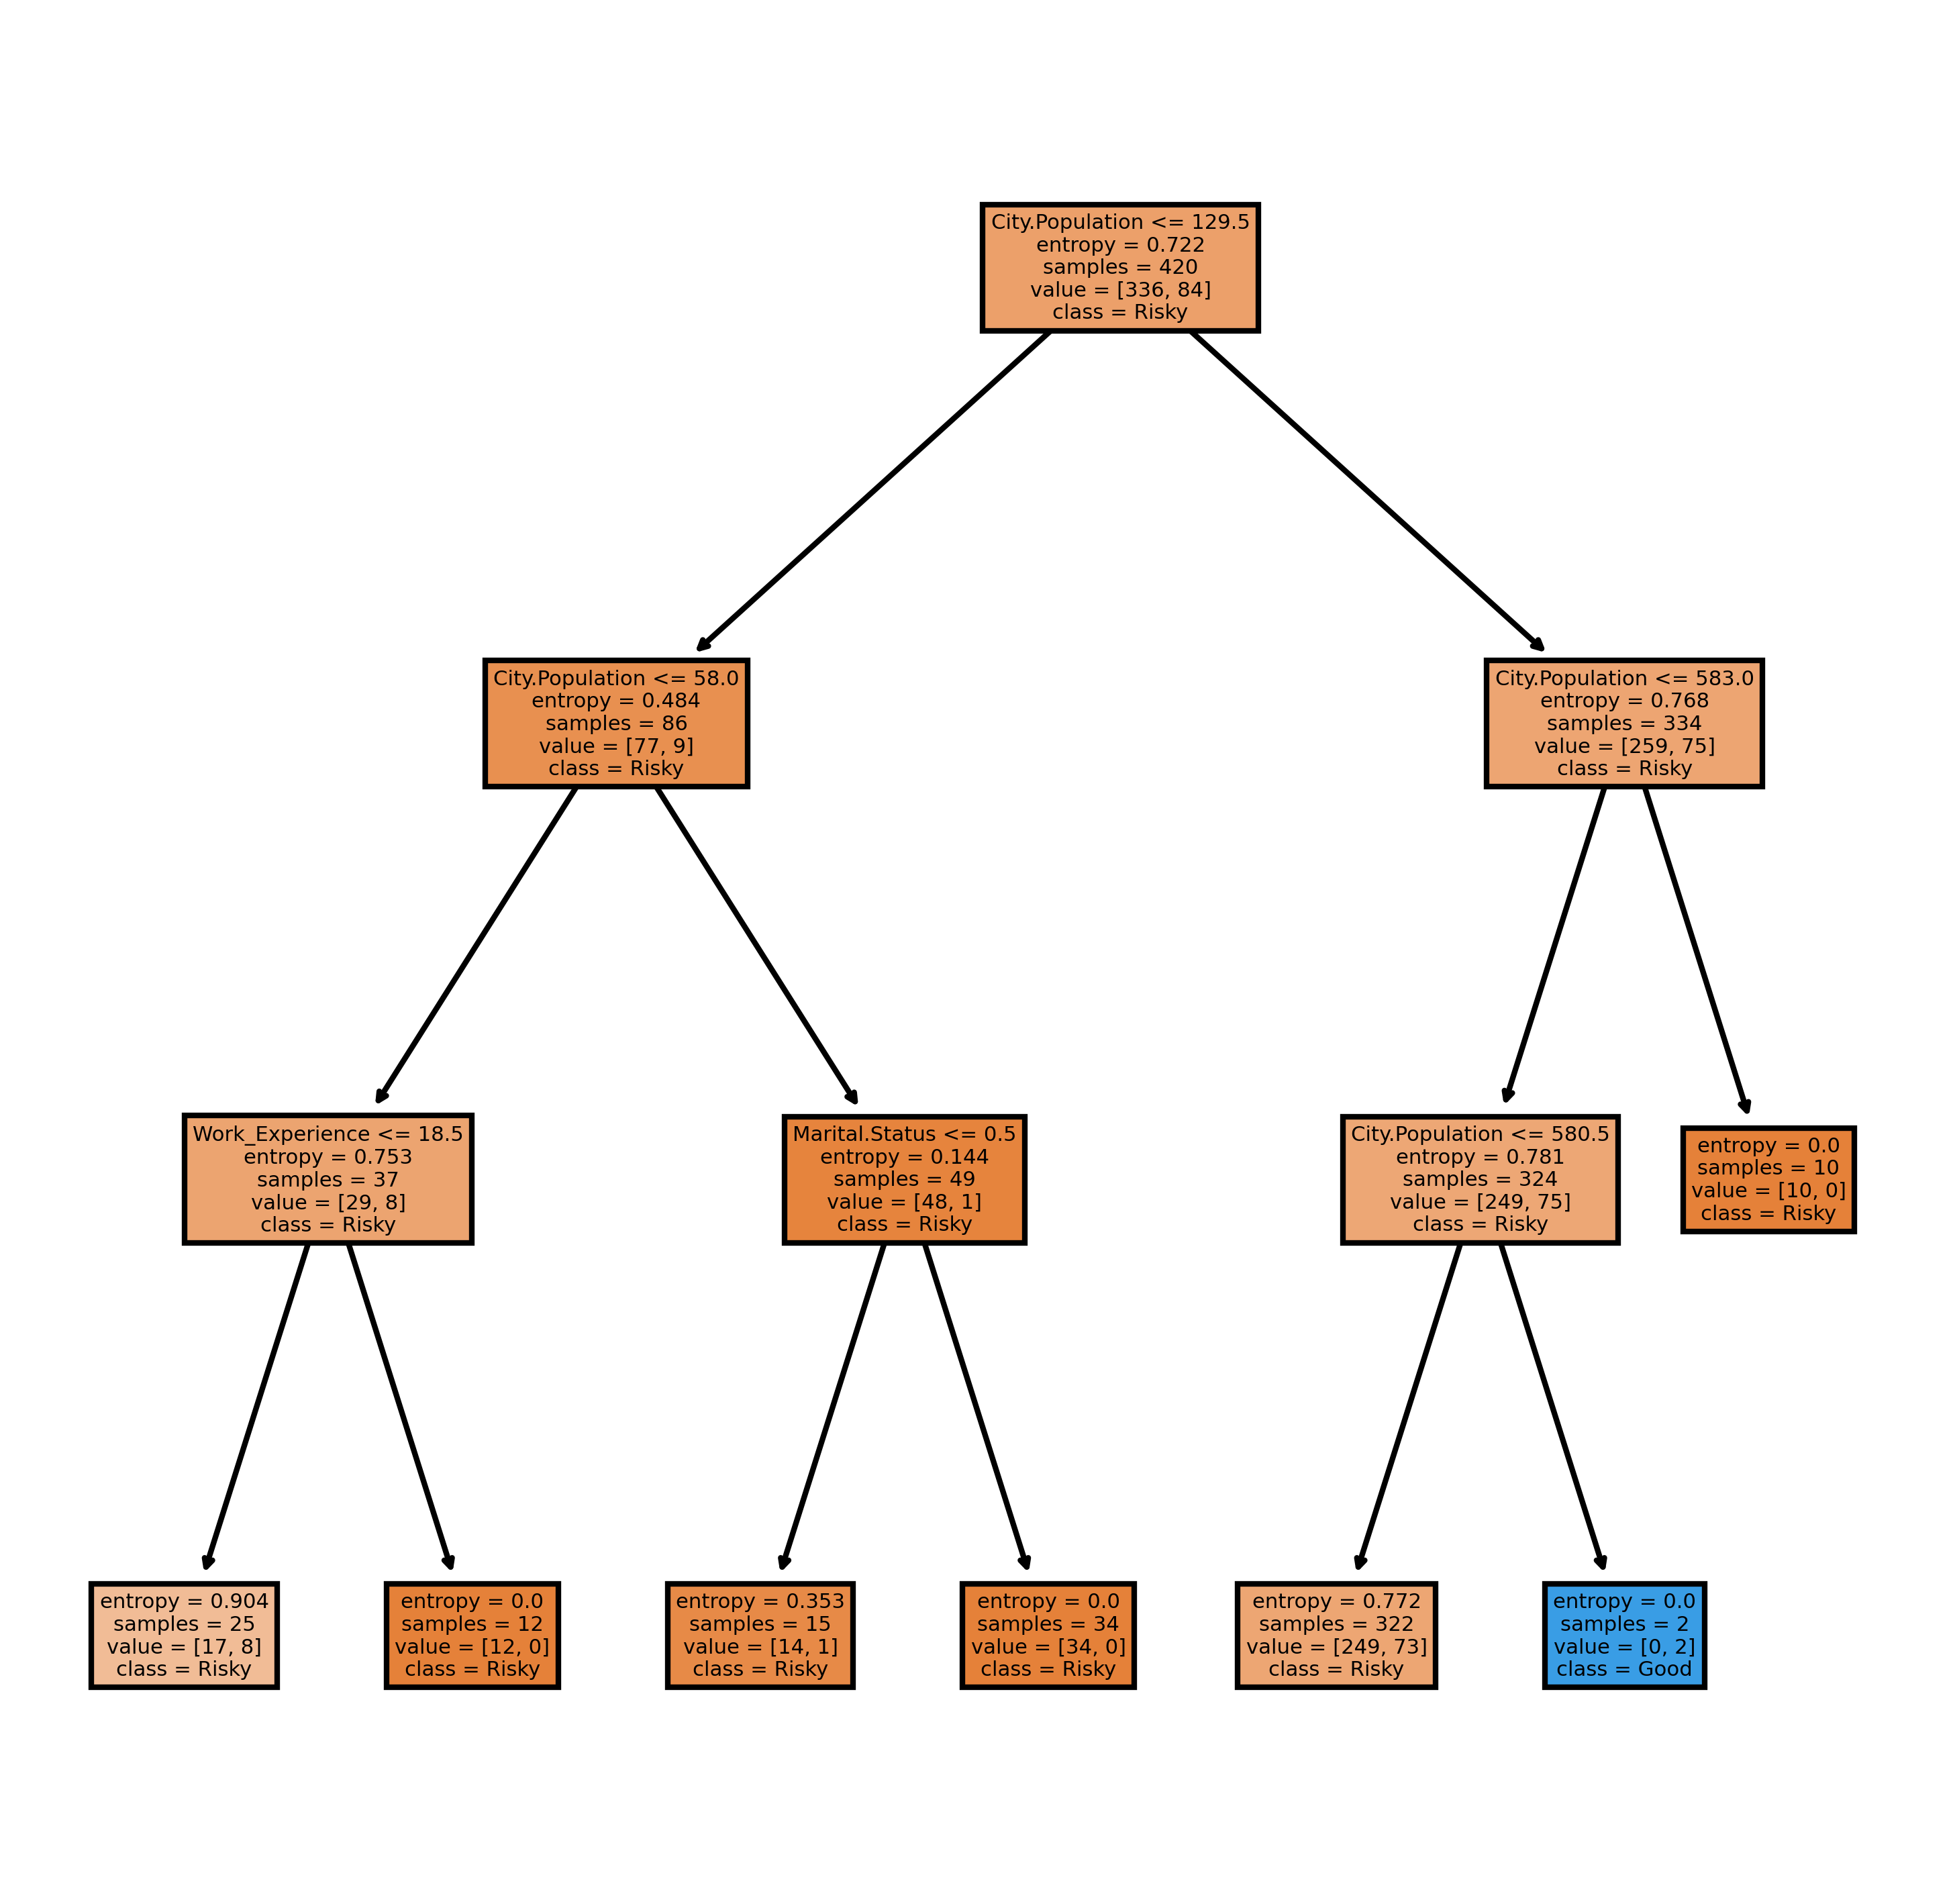

In [298]:
fn=['Undergrad', 'Marital.Status', 'City.Population', 'Work_Experience',
       'Urban', 'Income']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(classifier,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [301]:
#Predicting on test data
preds = classifier.predict(X_test) 

In [302]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [303]:
#pd.Series(preds).value_counts() # getting the count of each category 

In [304]:
#pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

In [305]:
# Accuracy 
#np.mean(preds==y_test)

In [306]:
#feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [307]:
sc.fit_transform(X_train,y_train)  # fitting model on x train

array([[ 0.98113038,  1.14802316,  1.61070554, -0.06043462,  1.        ],
       [-1.01923253,  1.14802316, -1.29180253,  1.05283463, -1.        ],
       [ 0.98113038, -1.26282547,  0.11529571, -0.17176154, -1.        ],
       ...,
       [ 0.98113038,  1.14802316,  0.52741653, -1.39635771,  1.        ],
       [ 0.98113038, -1.26282547, -1.76279775, -0.72839616, -1.        ],
       [ 0.98113038, -1.26282547,  1.15737264,  0.38487308,  1.        ]])

In [308]:
classifier_sc = DecisionTreeClassifier()  # decision tree classifier with gini method 
classifier_sc.fit(X_train,y_train)     # using decision tree classifier we fitting the model on x y train   

DecisionTreeClassifier()

In [309]:
classifier_sc.score(X_test,y_test)     # checking score using .score method on x y test

0.6611111111111111

In [310]:
#not good accuracy comparing to gini method.